<a href="https://colab.research.google.com/github/mortezam13/mnist1/blob/main/imdbR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import imdb
(train_data , train_labels),(test_data,test_labels)= imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

In [7]:
train_labels[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
from keras import losses
from keras import optimizers
from keras import metrics
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(partial_x_train,
partial_y_train,
epochs=10,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 46ms/step - loss: 0.6374 - acc: 0.6385 - val_loss: 0.5335 - val_acc: 0.8432
Epoch 2/10
30/30 [==============================] - 1s 30ms/step - loss: 0.5225 - acc: 0.7616 - val_loss: 0.4322 - val_acc: 0.8541
Epoch 3/10
30/30 [==============================] - 1s 32ms/step - loss: 0.4411 - acc: 0.8129 - val_loss: 0.3529 - val_acc: 0.8761
Epoch 4/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3763 - acc: 0.8501 - val_loss: 0.3128 - val_acc: 0.8848
Epoch 5/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3253 - acc: 0.8725 - val_loss: 0.3002 - val_acc: 0.8780
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.2850 - acc: 0.8914 - val_loss: 0.2798 - val_acc: 0.8882
Epoch 7/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2520 - acc: 0.9091 - val_loss: 0.2731 - val_acc: 0.8884
Epoch 8/10
30/30 [==============================] - 1s 32ms/step - loss: 0.2312 - a

In [ ]:
history_dict = history.history
history_dict.keys()



dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

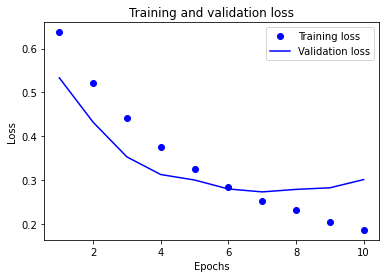

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
acc=history_dict['acc']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

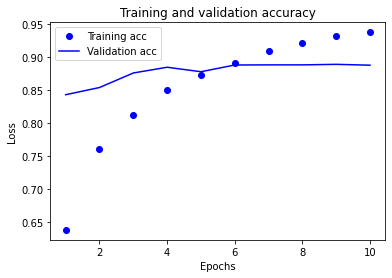

In [ ]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

array([[0.07794318],
       [0.99988735],
       [0.31295165],
       ...,
       [0.02065173],
       [0.02263743],
       [0.5115034 ]], dtype=float32)